In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os import path
from tqdm import tqdm
from cmb_sim import *
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [2]:
def draw_universe(u, alpha=1, name=None, step=0, nofig=False, ax=None):
    if not nofig:
        if ax is None:
            fig = plt.figure()
            ax = fig.add_subplot(projection='3d')
        if name is not None:
            ax.clf()
        ax.axes.set_xlim3d(left=0, right=1)
        ax.axes.set_ylim3d(bottom=0, top=1) 
        ax.axes.set_zlim3d(bottom=0, top=1) 
    e_x = []
    e_y = []
    e_z = []
    p_x = []
    p_y = []
    p_z = []
    H_x = []
    H_y = []
    H_z = []
    g_x = []
    g_y = []
    g_z = []
    for p in u.particles:
        if p.type == 'electron':
            e_x.append(p.x[0])
            e_y.append(p.x[1])
            e_z.append(p.x[2])
        elif p.type == 'proton':
            p_x.append(p.x[0])
            p_y.append(p.x[1])
            p_z.append(p.x[2])
        elif p.type == 'hydrogen':
            H_x.append(p.x[0])
            H_y.append(p.x[1])
            H_z.append(p.x[2])
        elif p.type == 'photon':
            g_x.append(p.x[0])
            g_y.append(p.x[1])
            g_z.append(p.x[2])
    for arr in [e_x, e_y, e_z, p_x, p_y, p_z, H_x, H_y, H_z, g_x, g_y, g_z]:
        arr = np.array(arr) / u.size
    if not nofig:
        ax.scatter(e_x, e_y, e_z, color='g', alpha=alpha)
        ax.scatter(p_x, p_y, p_z, color='b', alpha=alpha)
        ax.scatter(H_x, H_y, H_z, color='r', alpha=alpha)
        ax.scatter(g_x, g_y, g_z, color='purple', alpha=alpha)
    if name is not None:
        here = os.getcwd()
        os.makedirs(path.join(here, name), exist_ok=True)
        if not nofig:
            plt.savefig(path.join(here, name, str(step) + '.png'), dpi=300)
        else:
            fp = path.join(here, name, str(step) + '.json')
            with open(fp, 'w') as f:
                json.dump(u.to_json(), f)

In [3]:
u = Universe(1, 7, mpG=False, mpEvolve=False, mpE=False, mpMeasure=False, mpInteract=False)
u.add_electrons(50)
u.add_protons(50)
u.add_photons(10)
# u.add_photons(1000)
# u.add_hydrogens(10)

In [4]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
steps = 300
time_step = 0.001
photon_count = []
electron_count = []
proton_count = []
hydrogen_count = []
universe_size = []
vx = []
fx = []
d = []
for i in tqdm(range(steps)):
    # print('---')
    # print('step ' + str(i))
    # print(u)
    u.next_size = u.size * 1.005
    u.evolve(time_step)
    photon_count.append(u.photon_count())
    electron_count.append(u.electron_count())
    proton_count.append(u.proton_count())
    hydrogen_count.append(u.hydrogen_count())
    universe_size.append(u.size)
    d.append(dist(u.particles[0], u.particles[1]))
    vx.append(np.sqrt(np.sum(u.particles[0].v) ** 2))
    fx.append(u.particles[0].f[0])
# draw_universe(u, alpha=1, name=None, ax=ax)
photon_count = np.array(photon_count)
electron_count = np.array(electron_count)
proton_count = np.array(proton_count)
hydrogen_count = np.array(hydrogen_count)
universe_size = np.array(universe_size)

  1%|▏         | 4/300 [00:21<26:39,  5.40s/it]


KeyboardInterrupt: 

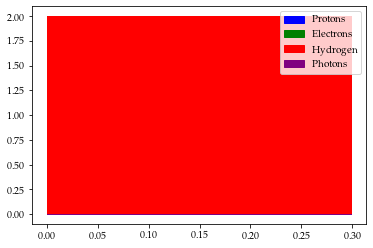

In [9]:
base = np.zeros(len(photon_count))
t = np.arange(len(photon_count)) * time_step
plt.fill_between(t, photon_count + hydrogen_count + electron_count, photon_count + hydrogen_count + electron_count + proton_count, label='Protons', color='b')
plt.fill_between(t, photon_count + hydrogen_count, photon_count + hydrogen_count + electron_count, label='Electrons', color='g')
plt.fill_between(t, photon_count, photon_count + hydrogen_count, label='Hydrogen', color='r')
plt.fill_between(t, base, photon_count, label='Photons', color='purple')
plt.legend()

In [14]:
print(u)

Size: 19.935955423519395
T: 0.1285846381716312

Particle 1
hydrogen
m: 1837.5
q: 0
x: [ 0.28263848 19.57637947 13.43313746]
v: [ 0.03603899 -0.0538716  -0.00025288]
E: [0. 0. 0.]
G: [0. 0. 0.]
Last Interaction: None

Particle 2
hydrogen
m: 1837.5
q: 0
x: [ 6.05517745 10.94280104 13.39265033]
v: [-0.03603899  0.0538716   0.00025288]
E: [0. 0. 0.]
G: [0. 0. 0.]
Last Interaction: None


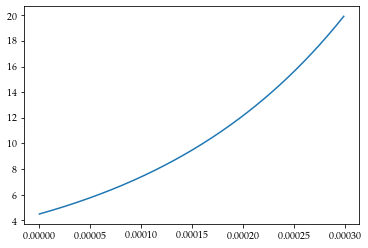

In [15]:
plt.plot(t * time_step, universe_size)

In [16]:
%matplotlib qt

cmb = get_cmb(u)
# theta = cmb[0]
# phi = cmb[1]

phi_bg, theta_bg = np.mgrid[0.0:np.pi:100j, 0.0:2.0*np.pi:100j]
x_bg = np.sin(phi_bg) * np.cos(theta_bg)
y_bg = np.sin(phi_bg) * np.sin(theta_bg)
z_bg = np.cos(phi_bg)

# x = np.cos(theta) * np.sin(phi)
# y = np.sin(theta) * np.sin(phi)
# z = np.cos(phi)

x, y, z = cmb

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_bg, y_bg, z_bg,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)
ax.scatter(x, y, z, color="r", s=20)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
plt.tight_layout()
plt.show()

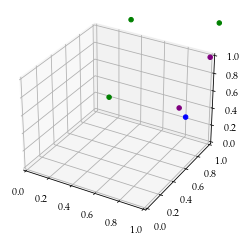

In [6]:
draw_universe(u)